## Analysis of Funding Received by Start-ups in India from 2018 to 2021

## 1. Business Understanding

     1.1 Project Description

This is analysis project focuses on the funding received by start-ups in India from 2018 to 2021. The objective is to gain insights into the Indian start-up ecosystem and recommend the best course of action for our team's venture. By analyzing the data on funding amounts, start-up details, and investor information, we aim to uncover prevailing patterns and gain insights into the opportunities within India's start-up ecosystem to inform decision-making.

     1.2 Type of Problem

This project involves exploratory data analysis (EDA) and visualization. Our goal is to deduce hidden insights and patterns from the available data.


## 2. Data Understanding

We have collected data from various startups in India spanning the years 2018 to 2021, including information on the amounts they received in funding. By analyzing this data, we aim to gain a deeper insight into the startup ecosystem and identify the key contributing factors.


## 3. Data Assumptions

The amounts in the 2019 dataset are all in USD. Please note that the exchange rate for 2018 is \***\*1 USD = 70 INR**.


## 4. Data Analytics questions and Hypthesis


    5 SMART Analytics Questions:

1.  What is the overall trend in funding received by start-ups in India from 2018 to 2021?
2.  Which sectors have received the highest funding during this period?
3.  What is the distribution of startups across the cities in India?
4.  What is the average funding amount received by start-ups in India during this period?
5.  Hypotheses

    Hypothesis 1

**Null Hypothesis (H₀):** There are no significant disparities in funding received by different sectors of Indian startups.

**Alternate Hypothesis (Ha):** The technology sector receives significantly higher funding compared to other industries.

    Hypothesis 2

**Null Hypothesis (H₀):** The location of a startup in a particular city does not influence the amount of funding it receives.

**Alternate Hypothesis (Ha):** The location of a startup in a particular city significantly affects the amount of funding it receives.

    Hypotheses justifications

**Hypothesis 1:** The technology sector is often seen as a high-growth area with substantial investment potential, which may lead to higher funding.

**Hypothesis 2:** Certain cities might have more developed startup ecosystems, better infrastructure, and more active investment communities, which could impact funding amounts.

    Testing Methods

**For Hypothesis 1:** We will use statistical tests like t-tests to compare the average funding amounts across different sectors.

**For Hypothesis 2:** We will use statistical tests such regression analysis to analyze the funding amounts across different cities.


## 5. Data preparation


    5.1 Importing libraries


In [1]:

import os, sys
from sqlalchemy import create_engine
import pyodbc # Database Connectivity with  Open Database Connectivity (pyodbc)

from dotenv import dotenv_values # dotenv library to load environment variables
# Lib for data manipulation  analysis  
import pandas as pd
import numpy as np
# lib for Vizualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy import stats
# from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

    5.2 Loading datasets


In [9]:
# Load environment variables from .env file 

environment_variables=dotenv_values('.env')
# Access login credentials from  the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

In [10]:
#  Credection Connection tesr
connection = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [11]:
# connect to the server with help of pyodbc.

con = pyodbc.connect(connection)

In [12]:
# Load the dataset SQL query
query1 = "Select * from dbo.LP1_startup_funding2020"
query2 = "Select * from dbo.LP1_startup_funding2021"

# Read data from the  on dataset 
data_2018 = pd.read_csv('dataset\startup_funding2018.csv')
data_2019 = pd.read_csv('dataset\startup_funding2019.csv')
data_2020 = pd.read_sql(query1, con)
data_2021 = pd.read_sql(query2, con)

    5.2.1 Data Overview


In [13]:
# 2018 dataset 
data_2018.head(3)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India


In [14]:
# 2019 dataset 
data_2019.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding


In [15]:
# 2020 dataset 
data_2020.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None


In [16]:
# 2021 dataset 
data_2021.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D


        5.3 Data Cleaning


    5.3.1 2018 Data


In [ ]:
# add Data Summary before staing cleaning

In [17]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


From the result summary

- 2018 Data has no Missing values


    Unique values in each column


In [18]:
data_2018.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [20]:
def uniqueValue(column): #Industry, Round/Series,Amount, Location and Amount
    return data_2018[column].value_counts()    

In [21]:
#Industry
uniqueValue("Industry")

Industry
—                                              30
Financial Services                             15
Education                                       8
Information Technology                          7
Health Care, Hospital                           5
                                               ..
Education, Gaming, Training                     1
Automotive, Search Engine, Service Industry     1
Wealth Management                               1
B2B, Farming, Marketplace                       1
Biotechnology, Health Care, Pharmaceutical      1
Name: count, Length: 405, dtype: int64

In [22]:
uniqueValue("Round/Series")

Round/Series
Seed                                                                                                       280
Series A                                                                                                    73
Angel                                                                                                       37
Venture - Series Unknown                                                                                    37
Series B                                                                                                    20
Series C                                                                                                    16
Debt Financing                                                                                              13
Private Equity                                                                                              10
Corporate Round                                                                                    

In [23]:
uniqueValue("Amount")

Amount
—              148
1000000         24
500000          13
2000000         12
₹50,000,000      9
              ... 
2200000          1
1200000          1
$15,000          1
$1,041,000       1
35000000         1
Name: count, Length: 198, dtype: int64

In [24]:
uniqueValue("Location")

Location
Bangalore, Karnataka, India         102
Mumbai, Maharashtra, India           94
Bengaluru, Karnataka, India          55
Gurgaon, Haryana, India              52
New Delhi, Delhi, India              51
Pune, Maharashtra, India             20
Chennai, Tamil Nadu, India           19
Hyderabad, Andhra Pradesh, India     18
Delhi, Delhi, India                  16
Noida, Uttar Pradesh, India          15
Haryana, Haryana, India              11
Jaipur, Rajasthan, India              9
Ahmedabad, Gujarat, India             6
Kolkata, West Bengal, India           6
Bangalore City, Karnataka, India      5
Indore, Madhya Pradesh, India         4
India, Asia                           4
Kormangala, Karnataka, India          3
Ghaziabad, Uttar Pradesh, India       2
Kochi, Kerala, India                  2
Bhopal, Madhya Pradesh, India         2
Thane, Maharashtra, India             2
Jodhpur, Rajasthan, India             1
Powai, Assam, India                   1
Andheri, Maharashtra, India    

Issue Identified in Data 2018

- **Amount Column** has more that one currency and some has No currency
- **Industry column** has not containd more indust per a company


    Check Duplications


In [25]:

data_2018.duplicated().value_counts()

False    525
True       1
Name: count, dtype: int64

    View the Duplications


In [26]:
data_2018[data_2018.duplicated(keep=False)]

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


    Dropping data duplicate


In [27]:
# Drop 2018 data duplicates
data_2018 = data_2018.drop_duplicates()

In [28]:
# double check the doublicates again 
data_2018.duplicated().value_counts()

False    525
Name: count, dtype: int64

No duplicate anymore in data 2018


    Data type conversion


The `Amount` column is currently classified as a string data type, but it should be represented as an integer. Several issues in this column need to be addressed:

- **Character Removal:** The presence of `,`, `$`, and `₹` characters must be eliminated.
- **Null Values:** The `_` characters, indicating null values, need to be handled appropriately.
- **Currency Standardization:** Amounts in Indian Rupees will be converted to US Dollars to maintain a consistent currency standard.we need ti use our assumption 1 USD = 70rupee based on avarege exchange rate of 2018
- **Data Type Conversion:** Finally, the `Amount` column will be converted to a numeric data type.


In [29]:
# Remove ',' in amount
data_2018['Amount'].replace(',','', regex=True, inplace=True)
data_2018['Amount'].head(15)

0        250000
1     ₹40000000
2     ₹65000000
3       2000000
4             —
5       1600000
6     ₹16000000
7     ₹50000000
8             —
9             —
10            —
11            —
12            —
13            —
14            —
Name: Amount, dtype: object

In [30]:
# A function to convert amount to $ and clean the amount column
def convert_to_usd(amount):
    exchange_rate = 70  # Exchange rate: 1 USD = 70 INR (0.014 usd = 1 rupp)

    if '₹' in str(amount):  # Check if the amount is in INR
        amount = float(str(amount).replace('₹', ''))  # Remove currency symbol and commas
        return round(amount / exchange_rate, 1)
    elif '$' in str(amount):
        amount = float(str(amount).replace('$','')) # f remove currency even is $ to make all column numeric type
        return round(amount, 1)
    elif "—" in str(amount):
        return None  #  a suitable value to represent missing/invalid data
    else:
        return float(amount)


# Apply the conversion function to the 'Amount' column
data_2018["Amount"] = data_2018["Amount"].apply(convert_to_usd)

In [31]:
data_2018["Amount"]=data_2018["Amount"].astype(float)
data_2018["Amount"].dtype

dtype('float64')

In [32]:
data_2018["Amount"].head(15)


0      250000.0
1      571428.6
2      928571.4
3     2000000.0
4           NaN
5     1600000.0
6      228571.4
7      714285.7
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
Name: Amount, dtype: float64

Based on other data across other 3 datasets which will later make merging easier, `Location` and `Industry` columns will only remain with the first word.


In [33]:
data_2018["Location"].head(10)

0         Bangalore, Karnataka, India
1          Mumbai, Maharashtra, India
2             Gurgaon, Haryana, India
3         Noida, Uttar Pradesh, India
4    Hyderabad, Andhra Pradesh, India
5         Bengaluru, Karnataka, India
6               Kalkaji, Delhi, India
7    Hyderabad, Andhra Pradesh, India
8          Mumbai, Maharashtra, India
9         Bangalore, Karnataka, India
Name: Location, dtype: object

In [34]:
data_2018["Location"] = data_2018["Location"].map(lambda x: x.split(',')[0])
data_2018["Location"].head(10)


0    Bangalore
1       Mumbai
2      Gurgaon
3        Noida
4    Hyderabad
5    Bengaluru
6      Kalkaji
7    Hyderabad
8       Mumbai
9    Bangalore
Name: Location, dtype: object

In [36]:
data_2018["Industry"].head(10)

0    Brand Marketing, Event Promotion, Marketing, S...
1                                 Agriculture, Farming
2     Credit, Financial Services, Lending, Marketplace
3                          Financial Services, FinTech
4                   E-Commerce Platforms, Retail, SaaS
5                     Cloud Infrastructure, PaaS, SaaS
6                       Internet, Leisure, Marketplace
7                                      Market Research
8         Information Services, Information Technology
9                                      Mobile Payments
Name: Industry, dtype: object

In [38]:
data_2018["Industry"] = data_2018["Industry"].map(lambda x: str(x).split(',')[0].strip() if pd.notnull(x) else x)

data_2018["Industry"].head(10)

0         Brand Marketing
1             Agriculture
2                  Credit
3      Financial Services
4    E-Commerce Platforms
5    Cloud Infrastructure
6                Internet
7         Market Research
8    Information Services
9         Mobile Payments
Name: Industry, dtype: object

Dealing with missing values


In [39]:
data_2018.isnull().sum()

Company Name       0
Industry           0
Round/Series       0
Amount           148
Location           0
About Company      0
dtype: int64

Missig value of 28% in column amount is a significant portion, let ` imputing with the mean` which a practical approach that prevents data loss while providing a reasonable estimate.


In [40]:
# Statistics summary
data_2018.describe()

,Amount
count,3.770000e+02
mean,1.754591e+07
std,7.787523e+07
min,8.571000e+02
25%,5.000000e+05
50%,1.300000e+06
75%,5.000000e+06
max,1.000000e+09


In [41]:
data_2018['Amount'].fillna(data_2018['Amount'].mean(), inplace=True)

In [42]:
data_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

To make merging and analysis easier, we will add a column called `Year Funded` that contains the year each startup received funding.


In [43]:

data_2018['Year Funded'] = 2018

In [45]:
data_2018.head(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company,Year Funded
0,TheCollegeFever,Brand Marketing,Seed,2.500000e+05,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,5.714286e+05,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,9.285714e+05,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2.000000e+06,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,1.754591e+07,Hyderabad,Eunimart is a one stop solution for merchants ...,2018


let select the columns to be used in analysis


In [54]:
data_2018.columns.tolist()

['Company Name',
 'Industry',
 'Round/Series',
 'Amount',
 'Location',
 'Year Funded']

From columns name 2018 data, About company will not contribute to our analysis, let drop it


In [49]:
data_2018.drop(['About Company'], axis=1, inplace=True)

In [56]:
data_2018.sample(15)

,Company Name,Industry,Round/Series,Amount,Location,Year Funded
96,Khidki,Artificial Intelligence,Seed,1.754591e+07,Bangalore,2018
187,PinkBlue,Health Care,Seed,3.000000e+05,Bangalore,2018
186,Awaaz De,Internet,Angel,1.754591e+07,Ahmedabad,2018
193,Aviom India Housing Finance,Finance,Series A,2.142857e+06,New Delhi,2018
214,Faclon Labs,Cloud Computing,Seed,1.754591e+07,Mumbai,2018
113,DataTrained,EdTech,Seed,1.714286e+06,Bangalore,2018
378,Detect Technologies,Artificial Intelligence,Series A,3.300000e+06,Chennai,2018
154,Articbot,Artificial Intelligence,Grant,1.714290e+04,Kannur,2018
401,Gugu,Battery,Seed,2.500000e+05,Coimbatore,2018
286,Sports Flashes Pvt. Ltd,Basketball,Seed,1.000000e+06,New Delhi,2018


In [61]:
# Add summary after completing data cleaning

    5.3.2 2019 Data


In [63]:
data_2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [64]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


![Data 2019 Summary Image](Images/Data%202019Summary%20with%20Data%20Wrangler.png)


Insight from above

- We have 87 Unique companies
- Most columns are string data type excpt Founded column
- We have missing values in Founded 29(33%), Headquarter 19(21%), Sector6(6%), Founders, Stage 46(52%)
- City with most startup in 2019 data is Bnagalore (24%), Mumbai (13%) and Delhi (11%), the missing Values is 21%


To speed up the data cleaning process, let uses d=function

1. For Descriptive statistics of a variable
2. For Data distribution of a variable (histogram)
3. For Check for missing values in a variable


In [74]:
# To find descriptive statistics of ou data
def descriptive_statistics(variable):
    return variable.describe()

# To plot the data distribution of out data using a histogram
def plot_data_distribution(variable):
    plt.hist(variable)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

# To check for missing values in a variable
def check_missing_values(variable):
    return variable.isnull().sum()

# To detect outliers
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
# ploting missing values 
def plot_missing_values_heatmap(df):
    # indicating missing values
    missing_values = df.isnull()

    colors = sns.color_palette(['#FF9933', '#FFFFFF', '#138808'])  # Saffron, White, Green(Indian color)
    # Plotting 
    sns.heatmap(missing_values, cmap=colors)
    plt.title('Missing Values Heatmap')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

In [71]:
check_missing_values(data_2019)

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

Imaging 2018 missing values


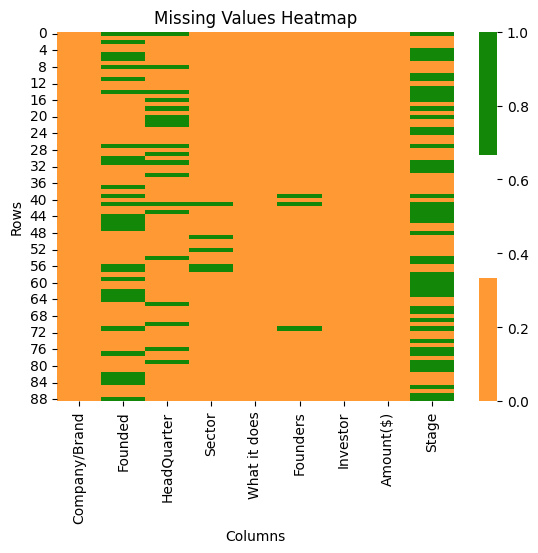

In [75]:
plot_missing_values_heatmap(data_2019)

The `Green` color is showing the missing value in dataset


    Unique values in some column we will use in analysis


Company column


In [80]:
data_2019["Company/Brand"].unique().tolist()

['Bombay Shaving',
 'Ruangguru',
 'Eduisfun',
 'HomeLane',
 'Nu Genes',
 'FlytBase',
 'Finly',
 'Kratikal',
 'Quantiphi',
 'Lenskart',
 'Cub McPaws',
 'Appnomic',
 'Kaleidofin',
 'JobSquare',
 'Open Secret',
 'LivFin',
 "Byju's",
 'Zest Money',
 'Witblox',
 'Azah Personal Care Pvt. Ltd.',
 'SalaryFits',
 'Pristyn Care',
 'Springboard',
 'DROR Labs Pvt. Ltd',
 'Medlife',
 'Seekify',
 'Toffee Insurance',
 'Fireflies .ai',
 'HungerBox',
 'Bijak',
 'Licious',
 'truMe',
 'Pumpkart',
 'Asteria Aerospace',
 'Rivigo',
 'HappyEasyGo',
 'Zetwerk',
 'Observe.AI',
 'Freshokartz',
 'Lil’ Goodness and sCool meal',
 'Trell',
 'VMate',
 'Bombay Shirt Company',
 'Slintel',
 'MyGameMate',
 'Afinoz',
 'Rein Games',
 'Ecozen',
 'Box8',
 'Awign Enterprises',
 'Purplle',
 'Freightwalla',
 'TapChief',
 'eJOHRI',
 'Ninjacart',
 'Binca Games',
 'KredX',
 'm.Paani',
 'Origo',
 'WishADish',
 'Ecom Express',
 'Stanza Living',
 'PiBeam',
 'Euler Motors',
 'Moms Co',
 'Cubical Labs',
 'Lawyered',
 'Cuemath',
 'Nive

Headqurter Columns


In [84]:
data_2019["HeadQuarter"].unique().tolist()

[nan,
 'Mumbai',
 'Chennai',
 'Telangana',
 'Pune',
 'Bangalore',
 'Noida',
 'Delhi',
 'Ahmedabad',
 'Gurugram',
 'Haryana',
 'Chandigarh',
 'Jaipur',
 'New Delhi',
 'Surat',
 'Uttar pradesh',
 'Hyderabad',
 'Rajasthan']

In [87]:
data_2019['HeadQuarter'] = data_2019['HeadQuarter'].fillna('Unknown')

Sector Column


In [88]:
data_2019["Sector"].unique().tolist()

['Ecommerce',
 'Edtech',
 'Interior design',
 'AgriTech',
 'Technology',
 'SaaS',
 'AI & Tech',
 'E-commerce',
 'E-commerce & AR',
 'Fintech',
 'HR tech',
 'Food tech',
 'Health',
 'Healthcare',
 'Safety tech',
 'Pharmaceutical',
 'Insurance technology',
 'AI',
 'Foodtech',
 'Food',
 'IoT',
 'E-marketplace',
 'Robotics & AI',
 'Logistics',
 'Travel',
 'Manufacturing',
 'Food & Nutrition',
 'Social Media',
 nan,
 'E-Sports',
 'Cosmetics',
 'B2B',
 'Jewellery',
 'B2B Supply Chain',
 'Games',
 'Food & tech',
 'Accomodation',
 'Automotive tech',
 'Legal tech',
 'Mutual Funds',
 'Cybersecurity',
 'Automobile',
 'Sports',
 'Healthtech',
 'Yoga & wellness',
 'Virtual Banking',
 'Transportation',
 'Transport & Rentals',
 'Marketing & Customer loyalty',
 'Infratech',
 'Hospitality',
 'Automobile & Technology',
 'Banking']

This unique values in this column indicate the diverse sectors of service among the start-ups. For better analysis, we will group similar sectors into broader categories.


In [89]:
# Group the sector based on similarity by By creating a dictionary
# The keys in the dictionary are specific sector names as they appear in the dataset.
# The values are the broder categories to which these specific sector names will be mapped to.
sector_mapping = {
    'Ecommerce': 'Ecommerce',
    'Edtech': 'Edtech',
    'Interior design': 'Interior Design',
    'AgriTech': 'AgriTech',
    'Technology': 'Technology',
    'SaaS': 'SaaS',
    'AI & Tech': 'Technology',
    'E-commerce': 'Ecommerce',
    'E-commerce & AR': 'Ecommerce',
    'Fintech': 'Fintech',
    'E-marketplace': 'Ecommerce',
    'Robotics & AI': 'Technology',
    'IoT': 'Technology',
    'Cybersecurity': 'Technology',
    'Virtual Banking': 'Fintech',
    'Banking': 'Fintech',
    'Mutual Funds': 'Fintech',
    'Insurance technology': 'Fintech',
    'HR tech': 'HR Tech',
    'Food tech': 'Food Tech',
    'Foodtech': 'Food Tech',
    'Food': 'Food Tech',
    'Food & Nutrition': 'Food Tech',
    'Food & tech': 'Food Tech',
    'Health': 'Health',
    'Healthcare': 'Health',
    'Healthtech': 'Health',
    'Yoga & wellness': 'Health',
    'Pharmaceutical': 'Health',
    'Safety tech': 'Safety Tech',
    'Logistics': 'Logistics',
    'Travel': 'Travel',
    'Transport & Rentals': 'Travel',
    'Transportation': 'Travel',
    'Accomodation': 'Travel',
    'Manufacturing': 'Manufacturing',
    'Social Media': 'Social Media',
    'E-Sports': 'E-Sports',
    'Cosmetics': 'Cosmetics',
    'B2B': 'B2B',
    'B2B Supply Chain': 'B2B',
    'Jewellery': 'Jewellery',
    'Games': 'Games',
    'Automotive tech': 'Automotive Tech',
    'Automobile': 'Automotive Tech',
    'Automobile & Technology': 'Automotive Tech',
    'Legal tech': 'Legal Tech',
    'Sports': 'Sports',
    'Marketing & Customer loyalty': 'Marketing & Customer Loyalty',
    'Infratech': 'Infratech',
    'Hospitality': 'Hospitality'
}

#  map to the 'Sector' column in the DataFrame
data_2019['Sector'] = data_2019['Sector'].map(sector_mapping)

# Display the updated unique values in the 'Sector' column
data_2019['Sector'].unique().tolist()


['Ecommerce',
 'Edtech',
 'Interior Design',
 'AgriTech',
 'Technology',
 'SaaS',
 'Fintech',
 'HR Tech',
 'Food Tech',
 'Health',
 'Safety Tech',
 nan,
 'Logistics',
 'Travel',
 'Manufacturing',
 'Social Media',
 'E-Sports',
 'Cosmetics',
 'B2B',
 'Jewellery',
 'Games',
 'Automotive Tech',
 'Legal Tech',
 'Sports',
 'Marketing & Customer Loyalty',
 'Infratech',
 'Hospitality']

Handle Missing Values


In [90]:
data_2019["Sector"] = data_2019["Sector"].fillna('Unknown')

Investor Column


In [101]:
# Check Dulpications for 2020 data
data_2020.duplicated().sum()

3

In [102]:
# Check Dulpications for 2021 data
data_2021.duplicated().sum()

19

Checking Missing Values


In [103]:
#check for missing data for 2018
missing_values_2018 = data_2018.isnull().sum
missing_values_2018()


Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [104]:
#check for missing data for 2019
missing_values_2019 = data_2019.isnull().sum
missing_values_2019()


Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [105]:
#check for missing data for 2020
missing_values_2020 = data_2020.isnull().sum
missing_values_2020()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [106]:
#check for missing data for 2021
missing_values_2021 = data_2021.isnull().sum
missing_values_2021()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

Add Year column to all datasets


In [107]:
# Adding a new "Year" column with the value of its value to all rows
data_2018['Year'] = 2018
data_2019['Year'] = 2019
data_2020['Year'] = 2020
data_2021['Year'] = 2021

Rename columns in 2018 and 2019 datasets


In [108]:
data_2018.rename(columns={'Company Name':'Company_Brand','Industry':'Sector','Round/Series':'Stage','Location':'HeadQuarter','About Company':'What it does'} ,inplace=True)
data_2019.rename(columns={'Company/Brand':'Company_Brand','Amount($)':'Amount'},inplace=True)



columns section for data analysis


In [109]:
# Select the specified columns for analysis
data_2018_selected = data_2018[['Company_Brand','HeadQuarter','Sector','Amount','Stage', 'Year']]
data_2019_selected = data_2019[['Company_Brand','HeadQuarter','Sector','Amount','Stage','Year']]
data_2020_selected = data_2020[['Company_Brand','HeadQuarter','Sector','Amount','Stage','Year']]
data_2021_selected = data_2021[['Company_Brand','HeadQuarter','Sector','Amount','Stage','Year']]




Combine all datasets into one dataframe combinedData


In [110]:
# concatinate the tables
combinedData= pd.concat([data_2018_selected,data_2019_selected,data_2020_selected,data_2021_selected],ignore_index=True)

In [111]:
combinedData.tail(10)

,Company_Brand,HeadQuarter,Sector,Amount,Stage,Year
2868,Proeon,Pune,Food Production,$2000000,Seed,2021
2869,InfyU Labs,Gandhinagar,AgriTech,$200000,Seed,2021
2870,TechEagle,Gurugram,Aviation & Aerospace,$500000,Seed,2021
2871,Voxelgrids,Bangalore,Deeptech,$5000000,None,2021
2872,Cogos Technologies,Bangalore,Logistics & Supply Chain,$2000000,Pre-series A,2021
2873,Gigforce,Gurugram,Staffing & Recruiting,$3000000,Pre-series A,2021
2874,Vahdam,New Delhi,Food & Beverages,$20000000,Series D,2021
2875,Leap Finance,Bangalore,Financial Services,$55000000,Series C,2021
2876,CollegeDekho,Gurugram,EdTech,$26000000,Series B,2021
2877,WeRize,Bangalore,Financial Services,$8000000,Series A,2021


Check Amount Columns


In [112]:
combinedData['Amount'].unique()

array(['TheCollegeFever is a hub for fun, fiesta and frolic of Colleges.',
       'A startup which aggregates milk from dairy farmers in rural Maharashtra.',
       'Leading Online Loans Marketplace in India', ..., '$6300000',
       '$23000000', '$55000000'], dtype=object)

In [113]:
# Replace  non-numerical values in the 'amount' column with 0
combinedData['Amount'].replace(['—','Undisclosed','None', '$Undisclosed', '$','Upsparks', 'JITO Angel Network, LetsVenture','Series C', 'Seed', '$undisclosed', 'ah! Ventures', 'Pre-series A', 'ITO Angel Network, LetsVenture'], 0, inplace=True)

In [114]:
combinedData['Amount'].unique()

array(['TheCollegeFever is a hub for fun, fiesta and frolic of Colleges.',
       'A startup which aggregates milk from dairy farmers in rural Maharashtra.',
       'Leading Online Loans Marketplace in India', ..., '$6300000',
       '$23000000', '$55000000'], dtype=object)

To check for the null Values in the Concataned table


In [115]:
combinedData.isna().sum()

Company_Brand      0
HeadQuarter      114
Sector            18
Amount           257
Stage            938
Year               0
dtype: int64

handling the missing Values


In [116]:
combinedData.fillna(value={'HeadQuarter':'Unknown','Sector':'Unknown','Amount':0,'Stage':'Unknown'},inplace=True)


In [117]:
combinedData.isna().sum()

Company_Brand    0
HeadQuarter      0
Sector           0
Amount           0
Stage            0
Year             0
dtype: int64

To convert the Amount Column to one currency


In [118]:
# Peak a sample data tp overview
combinedData.sample(10)

,Company_Brand,HeadQuarter,Sector,Amount,Stage,Year
2772,The Money Club,Noida,Financial Services,$1700000,Pre-series A,2021
1604,Skylo,Unknown,IoT,103000000.0,Series B,2020
103,Nutrisattva (Proliva),Anand,"Fitness, Food and Beverage, Health Care, Nutri...",Nutrisattva is a protein innovation compan,Angel,2018
950,JetSynthesys,Mumbai,Tech,40000000.0,Unknown,2020
431,Taru Naturals,Mumbai,"Agriculture, Farming",Taru Naturals is a network that connects farme...,Seed,2018
2737,Exotel,Bangalore,Telecommunications,$35000000,Series C,2021
1362,Convosight,Hyderabad,Data Analytics,4000000.0,Pre series A,2020
115,Satin Creditcare Network Limited (SCNL),New Delhi,"Banking, Finance, Financial Services, Non Profit",Satin is a non-banking finance company providi...,Post-IPO Debt,2018
264,Fixpocket,Ahmedabad,"Computer, Digital Marketing, Facilities Suppor...",Fixpocket is a internet-based startup.,Seed,2018
696,Clovia,Noida,E-commerce,4000000.0,Pre-series C,2020


In [119]:
combinedData.sample(20)

,Company_Brand,HeadQuarter,Sector,Amount,Stage,Year
1522,PlanetSpark,Gurugram,Edtech,448500.0,Unknown,2020
540,LivFin,Delhi,Fintech,"$5,000,000",Unknown,2019
1835,VerSe Innovation,Bangalore,Media,$450000000,Unknown,2021
1061,BluSmart,Gurugram,Electricity,7000000.0,Pre-series A,2020
1719,Do Your Thng,Gurugram,Marketing,"$1,500,000",Unknown,2021
1104,The Health company,Gurugram,AI health,350000.0,Unknown,2020
2345,MicroDegree,Mangalore,EdTech,0,Unknown,2021
14,Wide Mobility Mechatronics,Bangalore,Industrial Automation,Wide Mobility Mechatronics is a Private Compan...,Seed,2018
2012,Pepperfry,Mumbai,E-commerce,"$30,000,000",Debt,2021
2808,Gobbly,Gurugram,Retail,$900000,Pre-series A,2021


To Rename the Amount Column to show currency


In [120]:
combinedData.rename(columns={'Amount':'Amount($)'}, inplace=True)
combinedData.head()

,Company_Brand,HeadQuarter,Sector,Amount($),Stage,Year
0,TheCollegeFever,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",Seed,2018
1,Happy Cow Dairy,Mumbai,"Agriculture, Farming",A startup which aggregates milk from dairy far...,Seed,2018
2,MyLoanCare,Gurgaon,"Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,Series A,2018
3,PayMe India,Noida,"Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,Angel,2018
4,Eunimart,Hyderabad,"E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,Seed,2018


handle nan values by imputing by 0


In [121]:
combinedData.isna().sum()

Company_Brand    0
HeadQuarter      0
Sector           0
Amount($)        0
Stage            0
Year             0
dtype: int64

In [122]:
# Handle missing values
combinedData.fillna(0, inplace=True)

In [123]:
combinedData.isna().sum()

Company_Brand    0
HeadQuarter      0
Sector           0
Amount($)        0
Stage            0
Year             0
dtype: int64

Categorize the stage


In [124]:
combinedData['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', 'Unknown',
       'Fresh funding', 'Pre series A', 'Series G', 'Post series A',
       'Seed funding', 'Seed fund', 'Series F', 'Series B+', 'Seed round',
       'Pre-series A', 'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C',
       'Pre-series B', 'Bridge', 'Series B2', 'Pre- series A', 'Edge',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Funding',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Seed Round', 'Bridge Round', 'Pr

In [125]:
# To handle the speacial strings
combinedData['Stage'] = combinedData['Stage'].replace({'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593':'Unknown'})
combinedData['Stage'] =  combinedData['Stage'].fillna('Unknown')

In [126]:
combinedData['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed', 'Unknown',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C', 'Pre-series B',
       'Bridge', 'Series B2', 'Pre- series A', 'Edge', 'Pre-Series B',
       'Seed A', 'Series A-1', 'Seed Funding', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed round', 'Pre series B', 'Pre series C',
       'Seed Investment', 'Series D1', 'Mid series', 'Series C, D',

In [127]:
def categorize_funding_stage(stage):

    pre_Seed = ['Pre Seed','Pre seed round']
    seed_stages = ['Seed','Seed funding', 'Seed fund', 'Seed round', 'Seed A', 'Seed Round & Series A', 'Seed Investment', 'Early seed']
    pre_series = [ 'Pre series A', 'Pre-series A1', 'Pre Series A', 'Pre series A1', 'Pre-series A1', 'Pre series A', 'Pre series','Pre series B', 'Pre series C']
    series = ['Series A', 'Series A 1', 'Series A+', 'Seies A', 'Series A1', 'Series A2','Series B', 'Series B+', 'Series B2', 'Series B3','Series C', 'Series D', 'Series D1', 'Series E', 'Series E2', 'Series F', 'Series F1', 'Series F2', 'Series G', 'Series H', 'Series I']
    later_stages = ['Series Unknown','Angel Round' ,'Angel','Corporate Round', 'Funding Round', 'Mid series', 'Bridge', 'Bridge Round', 'Post series A', 'Post-IPO Equity', 'Secondary Market', 'Non-equity Assistance','Fresh funding', 'Grant', 'Undisclosed']
    debt = ['Post-IPO Debt','Debt Financing','Debt']
    others= ['Unknown', '$1200000', '$300000', '$6000000', '$1000000']
 
    if stage in pre_Seed:
        return 'Pre Seed Stage'
    elif stage in seed_stages:
        return 'Seed Stage'
    elif stage in pre_series:
        return 'Pre Series Stage'
    elif stage in series:
        return 'Series Stage'
    elif stage in later_stages:
        return 'Later Stage'
    elif stage in debt:
        return 'Debt Stage'
    else:
        return 'Others'

# Apply the function to the 'Stage' column
combinedData['Stage'] = combinedData['Stage'].apply(categorize_funding_stage)

In [128]:
# test my function
combinedData.sample(5)

,Company_Brand,HeadQuarter,Sector,Amount($),Stage,Year
1312,Indian School Finance Company,Hyderabad,Fintech,5271000.0,Others,2020
2013,Zingavita,Chandigarh,HealthTech,"$400,000",Others,2021
2169,Hyreo,Thiruvananthapuram,Human Resources,0,Others,2021
1017,ShareChat,Bangalore,Social media,40000000.0,Others,2020
292,Smartcoin,Bangalore,"Big Data, Financial Services, Machine Learning...",Providing financial access to the millions of ...,Seed Stage,2018


In [129]:
combinedData['Stage'].unique()

array(['Seed Stage', 'Series Stage', 'Later Stage', 'Others',
       'Debt Stage', 'Pre Series Stage', 'Pre Seed Stage'], dtype=object)

    To clean the 'HeadQuarter' Column


In [130]:

# Split the strings from the comma(,) then return the first index of the string 

combinedData['HeadQuarter'] = (combinedData['HeadQuarter'].str.split(',').str[0])


In [131]:
combinedData['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow', 'Unknown',
       'Telangana', 'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan',
       'Tirunelveli', 'Singapore', 'Gujarat', 'Kerala', 'Frisco',
       'California', 'Dhingsara', 'New York', 'Patna', 'San Francisco',
       'San Ramon', 'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area',
       'Bangaldesh', 'London', 'Milano', 'Palmwoods', 'France',
       'Samastipur', 

In [132]:
combinedData['HeadQuarter'] = combinedData['HeadQuarter'].replace({
    'Delhi':'New Delhi',
    'Bangalore City':'Bangalore',
    'Ahmadabad':'Ahmedabad',
    'Gurugram #REF!': 'Gurugram',
    'San Francisco Bay Area':  'San Franciscao'
       })

In [133]:
combinedData['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'New Delhi', 'India', 'Hubli', 'Chennai',
       'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad',
       'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur', 'Kota',
       'Anand', 'Belgaum', 'Thane', 'Margão', 'Indore', 'Alwar', 'Kannur',
       'Trivandrum', 'Ernakulam', 'Kormangala', 'Uttar Pradesh',
       'Andheri', 'Mylapore', 'Ghaziabad', 'Kochi', 'Powai', 'Guntur',
       'Kalpakkam', 'Bhopal', 'Coimbatore', 'Worli', 'Alleppey',
       'Chandigarh', 'Guindy', 'Lucknow', 'Unknown', 'Telangana',
       'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan', 'Tirunelveli',
       'Singapore', 'Gujarat', 'Kerala', 'Frisco', 'California',
       'Dhingsara', 'New York', 'Patna', 'San Francisco', 'San Ramon',
       'Paris', 'Plano', 'Sydney', 'San Franciscao', 'Bangaldesh',
       'London', 'Milano', 'Palmwoods', 'France', 'Samastipur', 'Irvine',
       'Tumkur', 'Newcastle Upon

In [134]:

# Function to categorize sectors
def categorize_sector(sector):
    # Mapping of sectors to categories
    sector_categories = {
        'Marketing': ['Brand Marketing', 'Event Promotion', 'Marketing', 'Sponsorship', 'Ticketing'],
        'Agriculture': ['Agriculture', 'Farming'],
        'Technology': ['E-Commerce', 'Internet', 'Apps', 'SaaS', 'Information Technology', 'Blockchain', 'Developer Tools'],
        'Healthcare': ['Health Care', 'Medical', 'Biotechnology', 'Pharmaceutical'],
        'Automotive': ['Automotive', 'Electric Vehicle', 'Autonomous Vehicles'],
        'Logistics': ['Logistics', 'Supply Chain Management', 'Transportation'],
        'Education': ['EdTech', 'Education', 'E-Learning', 'Higher Education'],
        'Food and Beverage': ['Food and Beverage', 'Food Delivery', 'Food Processing'],
        'Energy': ['Renewable Energy', 'Clean Energy', 'Solar', 'Energy Storage'],
        'Fashion': ['Fashion', 'Lifestyle'],
        'Real Estate': ['Real Estate'],
        'Finance': ['Finance', 'Financial Services', 'FinTech', 'Venture Capital', 'Payments', 'Wealth Management', 'Credit', 'Financial Services', 'Lending', 'Marketplace', 'Insurance', 'Payments'],
        'Media and Entertainment': ['Media and Entertainment', 'Broadcasting', 'Music', 'Video Streaming'],
    }

    # Iterate through categories and check if the sector belongs to any category
    for category, keywords in sector_categories.items():
        if any(keyword.lower() in sector.lower() for keyword in keywords):
            return category

    # If no category is matched, return 'Other'
    # return 'Other Category'

# Apply the function to the 'Sector' column
combinedData['Sector'] = combinedData['Sector'].apply(categorize_sector)

In [135]:
combinedData['Sector'].unique()

array(['Marketing', 'Agriculture', 'Finance', 'Technology', None,
       'Food and Beverage', 'Automotive', 'Logistics', 'Education',
       'Energy', 'Healthcare', 'Media and Entertainment', 'Fashion',
       'Real Estate'], dtype=object)

Handle Null value in Sector Column


In [136]:
combinedData['Sector'] =  combinedData['Sector'].fillna('Unknown')

In [137]:
combinedData['Sector'].unique()

array(['Marketing', 'Agriculture', 'Finance', 'Technology', 'Unknown',
       'Food and Beverage', 'Automotive', 'Logistics', 'Education',
       'Energy', 'Healthcare', 'Media and Entertainment', 'Fashion',
       'Real Estate'], dtype=object)

In [138]:
# peak the cleaned data
combinedData.head(1)

,Company_Brand,HeadQuarter,Sector,Amount($),Stage,Year
0,TheCollegeFever,Bangalore,Marketing,"TheCollegeFever is a hub for fun, fiesta and f...",Seed Stage,2018


Exploratory Data Analysis (EDA)


Visualize Data


1. What is the distribution of funding across various investment stages


In [139]:
# Visualize information using a pie chart.
Stages = combinedData.groupby('Stage')['Amount($)'].sum().nlargest(3)

Stages.plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('Stages')
plt.title('Top 3 Funding Stages')
plt.show()

TypeError: can only concatenate str (not "int") to str

2. What are the top 5 dominant sectors among startups


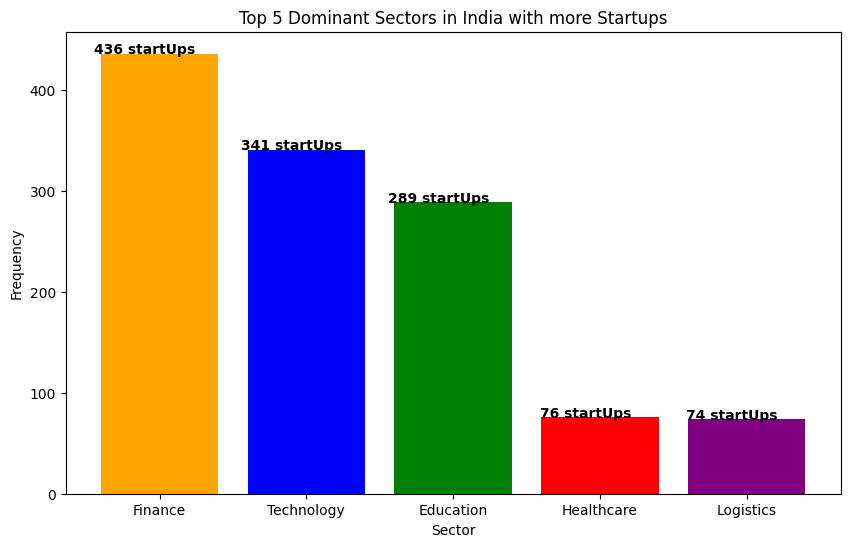

In [ ]:

combinedData['Sector'] = combinedData['Sector'].str.capitalize()
# tp_5_sectors = combinedData['Sector'].value_counts().head(5)
tp_5_sectors = combinedData['Sector'].value_counts().iloc[1:6]

# Define different colors for each bar
colors = ['orange', 'blue', 'green', 'red', 'purple']

# Create a bar chart with values on each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(tp_5_sectors.index, tp_5_sectors, color=colors)

# Add values on each bar
for bar, value in zip(bars, tp_5_sectors):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1,
    bar.get_height() + 0.1, str(value) + ' startUps',
    ha='center', 
    color='black', 
    fontweight='bold' )

plt.xlabel('Sector', loc='center')
plt.ylabel('Frequency')
plt.title('Top 5 Dominant Sectors in India with more Startups')
plt.show()

3. What are the cities that have attracted the most funding


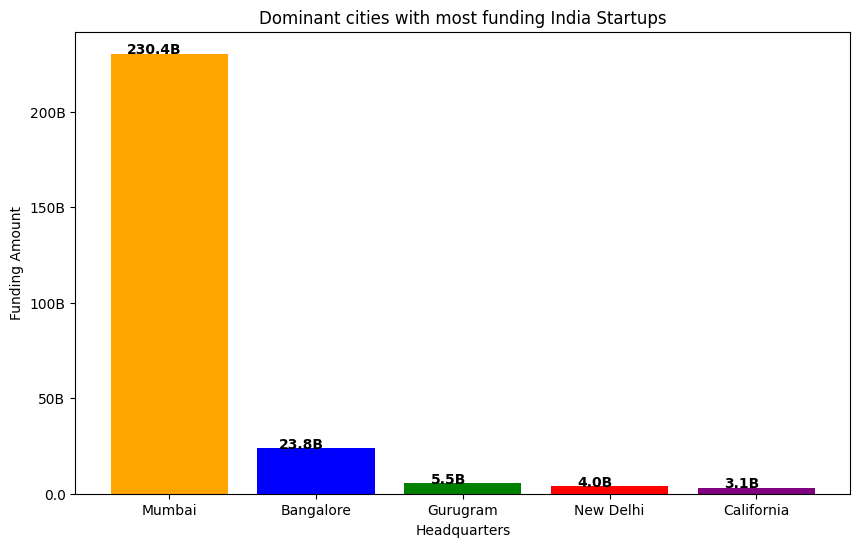

In [ ]:
Top_Funded_cities = combinedData.groupby(['HeadQuarter'])['Amount($)'].sum().nlargest(5)

# Create a bar chart with values on each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(Top_Funded_cities.index, Top_Funded_cities, color=colors)

# Add values on each bar with 'M', 'B', or no suffix
for bar, value in zip(bars, Top_Funded_cities):
    if value == 1000:
        text_value = '1000'
    else:
        text_value = (
            f'{value / 1e9:.1f}B' if value >= 1e9 else
            f'{value / 1e6:.1f}M' if value >= 1e6 else
            f'{value / 1e3:.1f}K' if value >= 1e3 else
            f'{value}'
        )

    plt.text(
        bar.get_x() + bar.get_width() / 2 - 0.1,
        bar.get_height() + 0.1,
        text_value,
        ha='center',
        color='black',
        fontweight='bold'
    )

# Format y-axis ticks in billions and millions
formatter = FuncFormatter(lambda x, _: f'{"%.0fB" % (x / 1e9) if x >= 1e9 else "%.0fM" % (x / 1e6) if x >= 1e6 else "%.0fK" % (x / 1e3) if x >= 1e3 else x}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Headquarters', loc='center')
plt.ylabel('Funding Amount')
plt.title('Dominant cities with most funding India Startups')

plt.show()


4. What is the distribution of funding across the four years


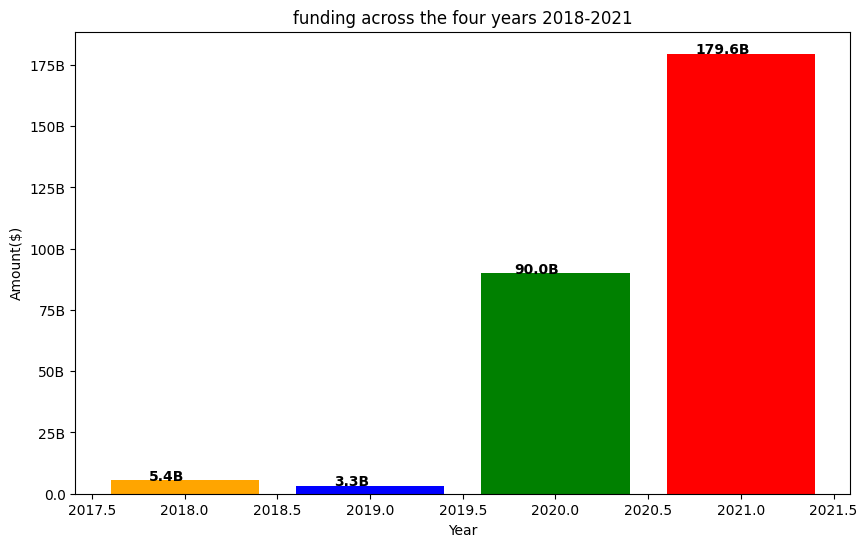

In [ ]:

# Group by year and sum the funding amounts
year_funds = combinedData.groupby(['Year'])['Amount($)'].sum()

# Define different colors for each bar
colors = ['orange', 'blue', 'green', 'red', 'purple']

# Create a bar chart with values on each bar
plt.figure(figsize=(10, 6), dpi=100)
bars = plt.bar(year_funds.index, year_funds, color=colors)

# Add values on each bar with 'M', 'B', or no suffix
for bar, value in zip(bars, year_funds):
    if value == 1000:
        text_value = '1000'
    else:
        text_value = (
            f'{value / 1e9:.1f}B' if value >= 1e9 else
            f'{value / 1e6:.1f}M' if value >= 1e6 else
            f'{value / 1e3:.1f}K' if value >= 1e3 else
            f'{value}'
        )

    plt.text(
        bar.get_x() + bar.get_width() / 2 - 0.1,
        bar.get_height() + 0.1,
        text_value,
        ha='center',
        color='black',
        fontweight='bold'
    )

# Format y-axis ticks in billions and millions
formatter = FuncFormatter(lambda x, _: f'{"%.0fB" % (x / 1e9) if x >= 1e9 else "%.0fM" % (x / 1e6) if x >= 1e6 else "%.0fK" % (x / 1e3) if x >= 1e3 else x}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Year')
plt.ylabel('Amount($)')
plt.title('funding across the four years 2018-2021')
plt.show()


5.  What is the distribution of the number of startups that received funding in each year from 2018 to 2021?


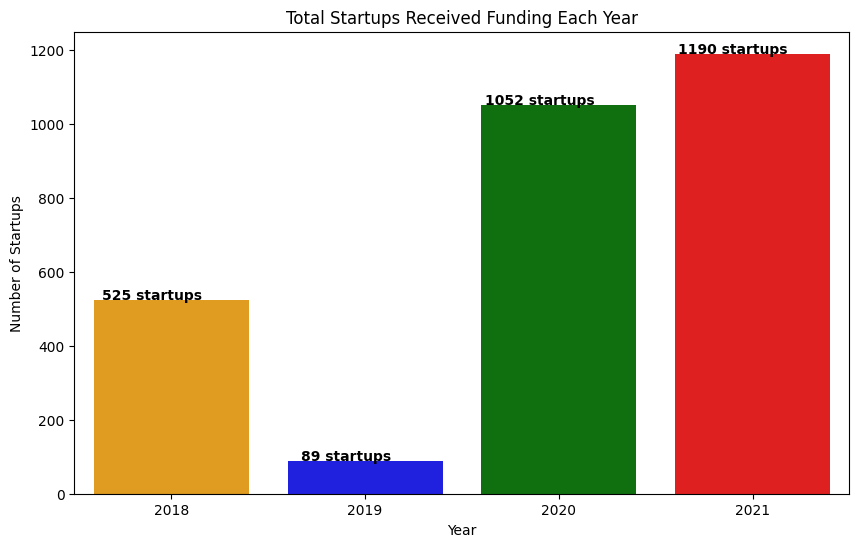

In [ ]:

# Count the number of startups in each year
startups_count = combinedData.groupby(['Year'])['Company_Brand'].count().reset_index()

# Create a bar chart with values on each bar
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=startups_count['Company_Brand'], x=startups_count['Year'], palette=colors)

# Add count values on top of each bar
for bar, count in zip(ax.patches, startups_count['Company_Brand']):
    plt.text(
        bar.get_x() + bar.get_width() / 2 - 0.1 ,
        bar.get_height() + 0.1,
        f'{count}' + ' startups',
        ha='center',
        color='black',
        fontweight='bold'
    )

plt.title('Total Startups Received Funding Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.show()


Test HYTPOSIS


Conclusion


The analysis suggests a dynamic and growing startup ecosystem, with a diverse range of sectors attracting substantial funding. The concentration of funding in specific cities, such as Mumbai, Bangalore, and Gurugram, highlights the importance of geographical factors in the startup landscape. The upward trend in funding over the years, particularly the significant increase in 2021, indicates a robust and expanding startup ecosystem. However, it's essential to consider external factors and market conditions that may influence funding trends. The findings provide valuable insights for investors interested in the startup ecosystem in India Startups.


In [ ]:

# Specify the path where you want to save the CSV file
csv_file_path = 'dataset\cleanedData.csv'

# Export the cleaned data to a CSV file
combinedData.to_csv(csv_file_path, index=False)

# Display a message to indicate successful export
print(f'The cleaned data has been exported to: {csv_file_path}')

The cleaned data has been exported to: dataset\cleanedData.csv
